In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
color_pal = sns.color_palette('pastel')

In [3]:
df_train = pd.read_csv('train.csv')
df_test =  pd.read_csv('test.csv')
all_data = pd.concat((df_train.loc[:, 'MSSubClass':'SaleCondition'],
                     df_test.loc[:,'MSSubClass':'SaleCondition']))

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_19660\2914440693.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index


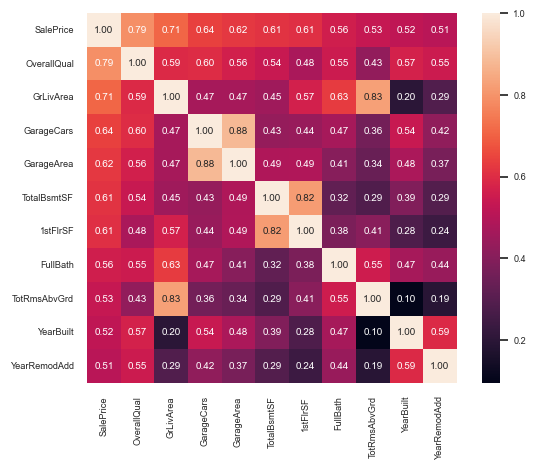

In [5]:
k = 11
cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 0.60)
hm = sns.heatmap(cm, cbar = True, square=True, annot = True, fmt = '.2f', xticklabels=cols.values, yticklabels=cols.values)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

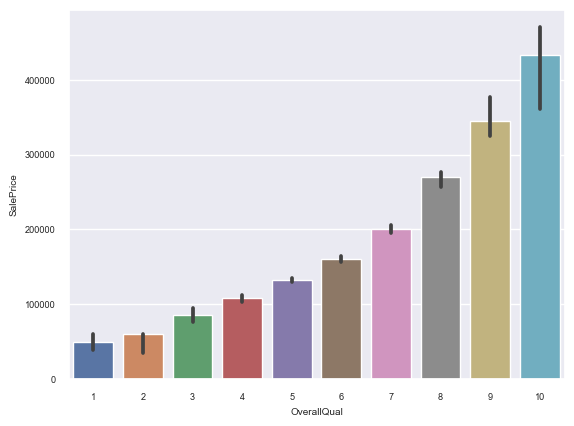

In [6]:
sns.barplot(data = df_train, x = 'OverallQual', y = 'SalePrice', estimator = 'median')

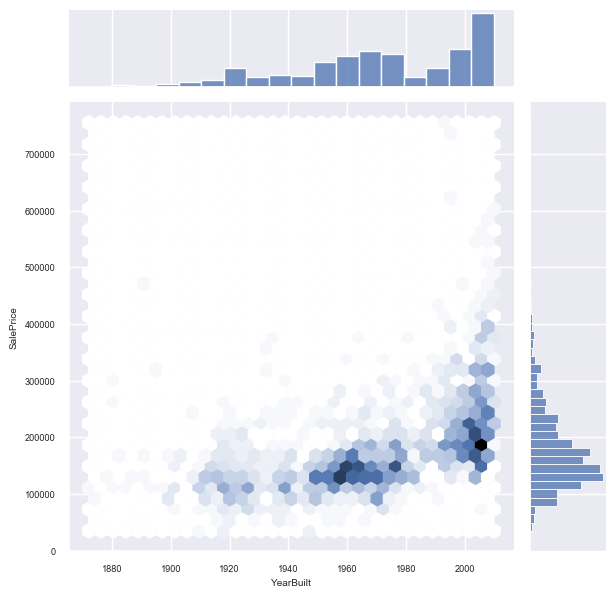

In [7]:
#SalePrice vs Yearbuild
sns.jointplot(data = df_train, x = df_train['YearBuilt'], y= df_train['SalePrice'], kind = 'hex')

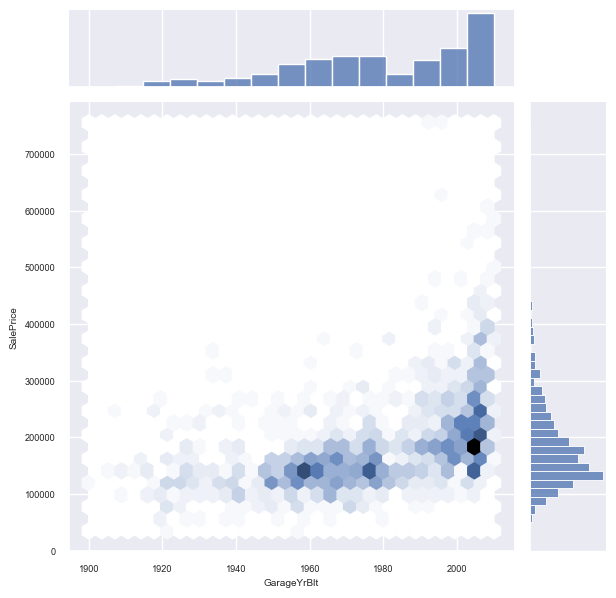

In [8]:
#Garage Year Built (GarageYrBlt) feature vs Saleprice in hexagonplot
sns.jointplot(data = df_train, x = df_train['GarageYrBlt'], y= df_train['SalePrice'], kind = 'hex')

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

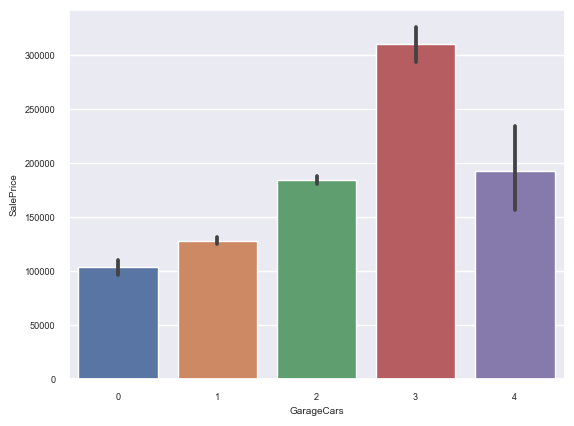

In [9]:
#GarageCars vs SalePrice
sns.barplot(data = df_train, x = df_train['GarageCars'], y = df_train['SalePrice'])

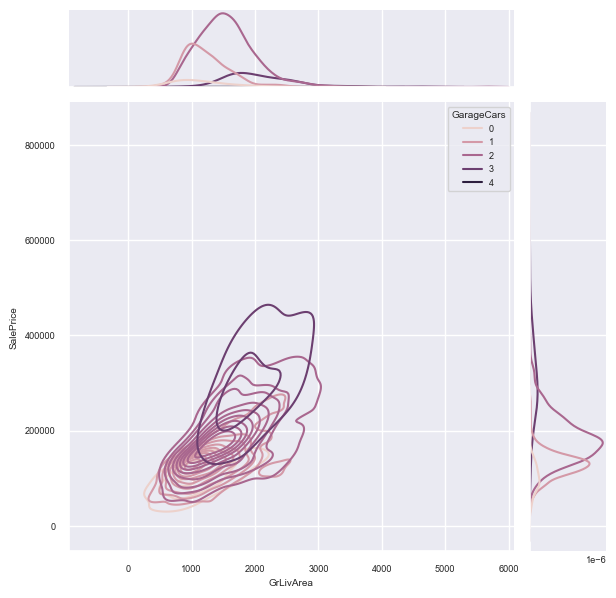

In [10]:
#SalePrice vs GrLivArea (based on GarageCars)
sns.jointplot(data = df_train, x = df_train['GrLivArea'], y = df_train['SalePrice'], kind = 'kde', hue = df_train['GarageCars'], color='red')

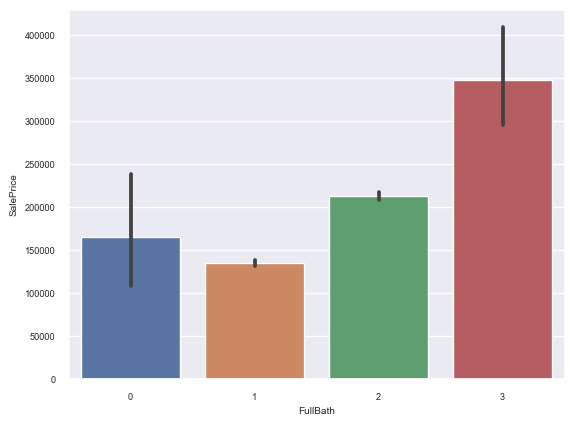

In [11]:
#FullBath vs SalePrice

sns.barplot(data = df_train, x = df_train.FullBath, y = df_train.SalePrice)
plt.show()

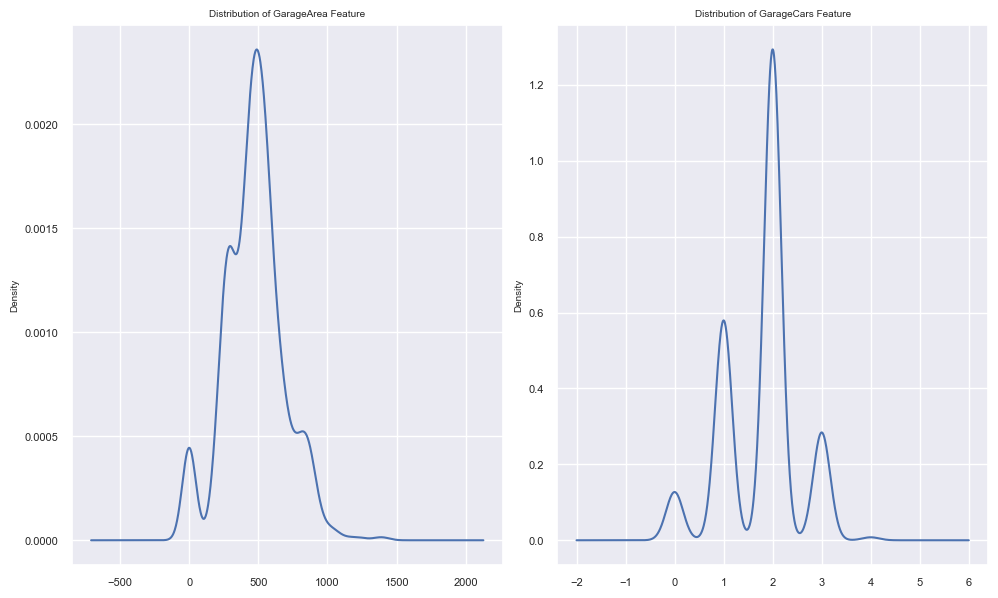

In [12]:
#Gaussian Distribution of GarageX features
fig, axs = plt.subplots(1,2, figsize = (10,6))

df_train['GarageArea'].plot(kind = 'density', ax = axs[0], xlabel = 'GarageArea', title = 'Distribution of GarageArea Feature', fontsize = 8)
df_train['GarageCars'].plot(kind = 'density', ax = axs[1], xlabel = 'GarageCars', title = 'Distribution of GarageCars Feature', fontsize = 8)
fig.tight_layout()

<Axes: xlabel='SalePrice', ylabel='Density'>

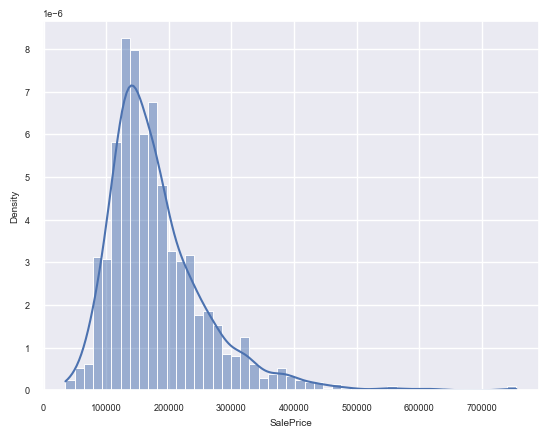

In [13]:
#Gaussian Distribution of SalePrice
from scipy import stats
from scipy.stats import norm

sns.histplot(df_train['SalePrice'], kde = True, stat = 'density')

Text(0.5, 1.0, 'Normal Distribution after log1p Transformation')

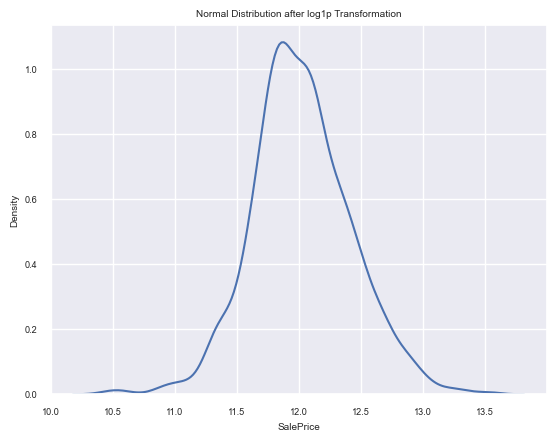

In [14]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
sns.kdeplot(df_train, x = df_train['SalePrice'])
plt.title('Normal Distribution after log1p Transformation') 

<Axes: xlabel='GrLivArea', ylabel='Density'>

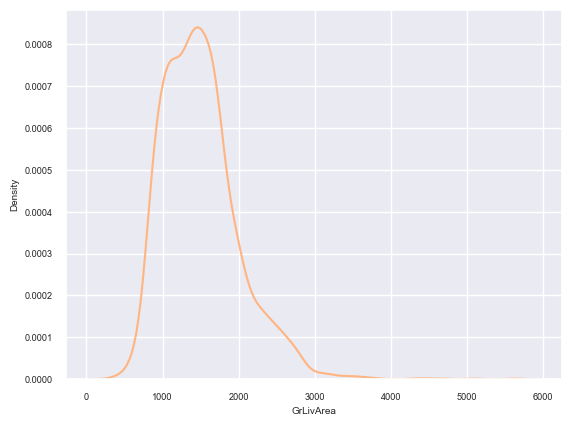

In [15]:
#GrLivArea Gaussian distribution
sns.kdeplot(all_data['GrLivArea'], color=color_pal[1])

## Preprocessing

In [16]:
# Count total missing data
total = all_data.isnull().sum().sort_values(ascending= False)
percent = (all_data.isnull().sum()*100/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071


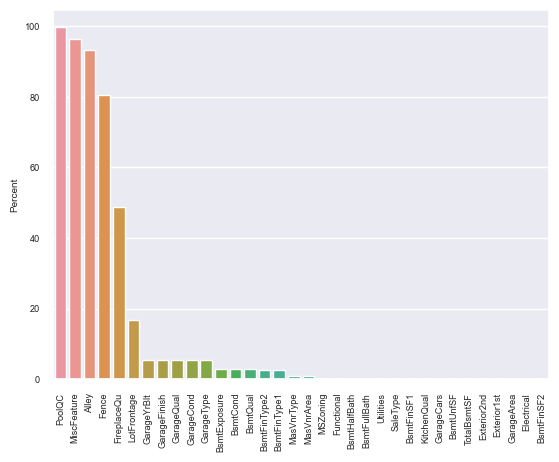

In [17]:
#Create a barplot
true_miss_data = missing_data.drop(missing_data[missing_data['Total']==0].index)
sns.barplot(data = true_miss_data, x = true_miss_data.index, y = true_miss_data.Percent)
plt.xticks(rotation = 90)
plt.show()

In [18]:
#Drop the columns with the most null value 
all_data = all_data.drop((missing_data[missing_data['Total']>80]).index, axis = 1)
all_data = all_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [19]:
# Make it sure there is no NAN data
total = all_data.isnull().sum().sort_values(ascending = False)
percent = (all_data.isnull().sum()*100/all_data.isnull().count()).sort_values(ascending = True)
data_ = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
data_.head()

,Total,Percent
MSSubClass,0,0.0
Heating,0,0.0
CentralAir,0,0.0
Electrical,0,0.0
1stFlrSF,0,0.0


In [20]:
#Let's check zero value each column
all_data[all_data[all_data.columns]==0].count().sort_values(ascending = False).head(20)

PoolArea         2906
3SsnPorch        2882
LowQualFinSF     2879
MiscVal          2816
BsmtHalfBath     2744
ScreenPorch      2663
BsmtFinSF2       2572
EnclosedPorch    2460
HalfBath         1834
MasVnrArea       1761
BsmtFullBath     1707
2ndFlrSF         1668
WoodDeckSF       1523
Fireplaces       1420
OpenPorchSF      1298
BsmtFinSF1        930
BsmtUnfSF         242
GarageArea        158
GarageCars        157
TotalBsmtSF        79
dtype: int64

In [21]:
from scipy.stats import skew
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
skew_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skew_feats = skew_feats[skew_feats > 0.5]
print('Skew Features:')
skew_data = pd.DataFrame({'Skewness': skew_feats})
skew_data

Skew Features:


,Skewness
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.931594


In [22]:
#transform all data by using log1p
all_data[skew_feats.index] = np.log1p(all_data[skew_feats.index]) 

In [23]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewed_feats = skewed_feats[skewed_feats>0.5]
print('Skew in numerical features')
skewness_train = pd.DataFrame({'Skew':skewed_feats})
skewness_train.head(10)

Skew in numerical features


,Skew
PoolArea,14.998335
3SsnPorch,8.825256
LowQualFinSF,8.557690
MiscVal,5.213984
BsmtHalfBath,3.774762
KitchenAbvGr,3.520351
ScreenPorch,2.945905
BsmtFinSF2,2.462483
EnclosedPorch,1.961081
HalfBath,0.580692


In [24]:
all_data[all_data[all_data.columns]==0].count().sort_values (ascending = False).head(15)

PoolArea         2906
3SsnPorch        2882
LowQualFinSF     2879
MiscVal          2816
BsmtHalfBath     2744
ScreenPorch      2663
BsmtFinSF2       2572
EnclosedPorch    2460
HalfBath         1834
MasVnrArea       1761
BsmtFullBath     1707
2ndFlrSF         1668
WoodDeckSF       1523
Fireplaces       1420
OpenPorchSF      1298
dtype: int64

In [25]:
# Zero value doesn't conversted, so we delete it.
all_data = all_data.drop((skewness_train[skewness_train['Skew'] > 0.5]).index, axis = 1)

In [26]:
all_data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [27]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewed_feats = skewed_feats[skewed_feats>0.5]
print('Skew in numerical features')
skewness_train = pd.DataFrame({'Skew':skewed_feats})
skewness_train.head(10)

Skew in numerical features


,Skew


## Create Prediction

In [4]:
X_train = all_data[:df_train.shape[0]]
X_test = all_data[df_train.shape[0]:]
y_train = df_train.SalePrice

In [5]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [6]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [8]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5))
    return rmse

def rmse_test(y, y_pred):
    rmse_ = np.sqrt(mean_squared_error(y, y_test))
    return rmse_

In [32]:
categorical = X_train.select_dtypes(include = 'object').columns

sc = StandardScaler()
pca = PCA(n_components=3)

for col in categorical:
    lbl = LabelEncoder()
    lbl.fit(list(X_train[col].values))
    X_train[col] = lbl.transform(list(X_train[col].values))
    X_test[col] = lbl.transform(list(X_test[col].values))

C:\Users\HP\AppData\Local\Temp\ipykernel_19660\2020919951.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = lbl.transform(list(X_train[col].values))
C:\Users\HP\AppData\Local\Temp\ipykernel_19660\2020919951.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = lbl.transform(list(X_test[col].values))
C:\Users\HP\AppData\Local\Temp\ipykernel_19660\2020919951.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [33]:
# After using Standard Scaler
X_train

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,3,9.042040,1,3,3,0,4,0,5,...,0.000000,2.0,548.0,2,0.000000,4.127134,2,2008,8,4
1,3.044522,3,9.169623,1,3,3,0,2,0,24,...,0.693147,2.0,460.0,2,5.700444,0.000000,5,2007,8,4
2,4.110874,3,9.328212,1,0,3,0,4,0,5,...,0.693147,2.0,608.0,2,0.000000,3.761200,9,2008,8,4
3,4.262680,3,9.164401,1,0,3,0,0,0,6,...,0.693147,3.0,642.0,2,0.000000,3.583519,2,2006,8,0
4,4.110874,3,9.565284,1,0,3,0,2,0,15,...,0.693147,3.0,836.0,2,5.262690,4.442651,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,3,8.976894,1,3,3,0,4,0,8,...,0.693147,2.0,460.0,2,0.000000,3.713572,8,2007,8,4
1456,3.044522,3,9.486152,1,3,3,0,4,0,14,...,1.098612,2.0,500.0,2,5.857933,0.000000,2,2010,8,4
1457,4.262680,3,9.109746,1,3,3,0,4,0,6,...,1.098612,1.0,252.0,2,0.000000,4.110874,5,2010,8,4
1458,3.044522,3,9.181735,1,3,3,0,4,0,12,...,0.000000,1.0,240.0,2,5.905362,0.000000,4,2010,8,4


In [34]:
# Standarized first before using PCA
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

In [35]:
X_train_pca = pca.fit_transform(X_train_scaled)

In [36]:
pca_train = pd.DataFrame(X_train_pca, columns = ['PCA1', 'PCA2', 'PCA3'])
pca_train

,PCA1,PCA2,PCA3
0,1.980313,0.368321,-1.558543
1,-0.130624,-1.592352,1.079648
2,2.545855,0.096382,-0.853060
3,0.159351,0.272763,1.449757
4,4.739672,0.638170,0.510224
...,...,...,...
1455,1.120090,2.410294,-1.403671
1456,0.745765,-1.913483,2.665121
1457,2.483568,1.846087,-0.290681
1458,-2.813619,-2.423960,0.391606


In [37]:
var = pca.explained_variance_
var

array([7.91788607, 3.5626479 , 3.07432121])

In [38]:
pca.explained_variance_ratio_

array([0.14652709, 0.06592977, 0.05689288])

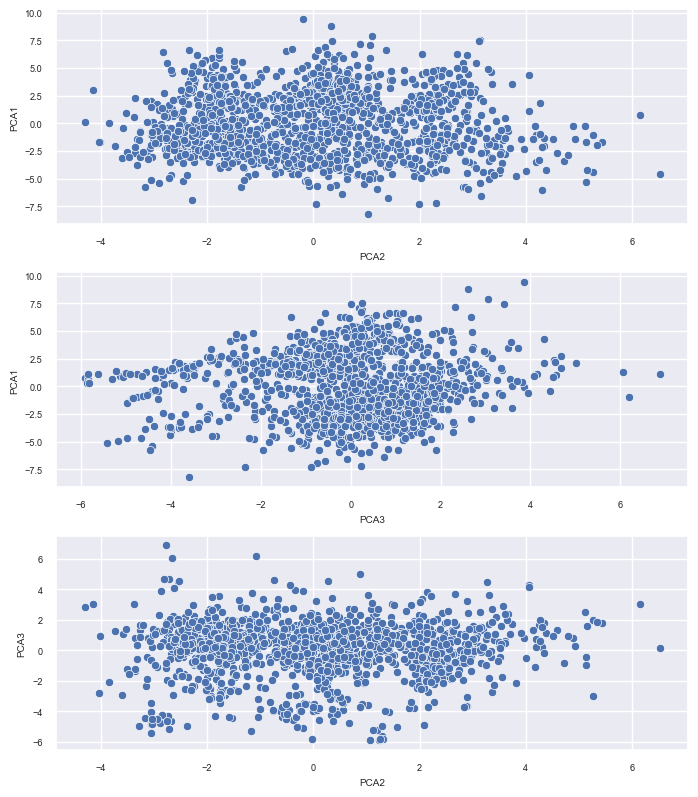

In [39]:
fig, ax = plt.subplots(figsize = (7,8), nrows = 3, ncols = 1)

sns.scatterplot(x = pca_train['PCA2'], y = pca_train['PCA1'], ax = ax[0])
sns.scatterplot(x = pca_train['PCA3'], y = pca_train['PCA1'], ax = ax[1])
sns.scatterplot(x = pca_train['PCA2'], y = pca_train['PCA3'], ax = ax[2])
plt.tight_layout()

In [40]:
X_test_scaled = sc.fit_transform(X_test)
X_test_pca = pca.fit_transform(X_test_scaled)
pca_test = pd.DataFrame(X_test_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_test

,PCA1,PCA2,PCA3
0,-2.374217,-1.723495,-0.676446
1,-0.428897,-1.839573,-1.926500
2,1.208813,0.738775,0.695751
3,2.023896,0.926095,0.971806
4,1.511660,-1.423002,3.133898
...,...,...,...
1454,-4.622937,1.640915,4.627522
1455,-3.891082,0.970491,4.482024
1456,-0.342288,-1.996200,-1.796394
1457,-1.891883,-0.166169,1.471683


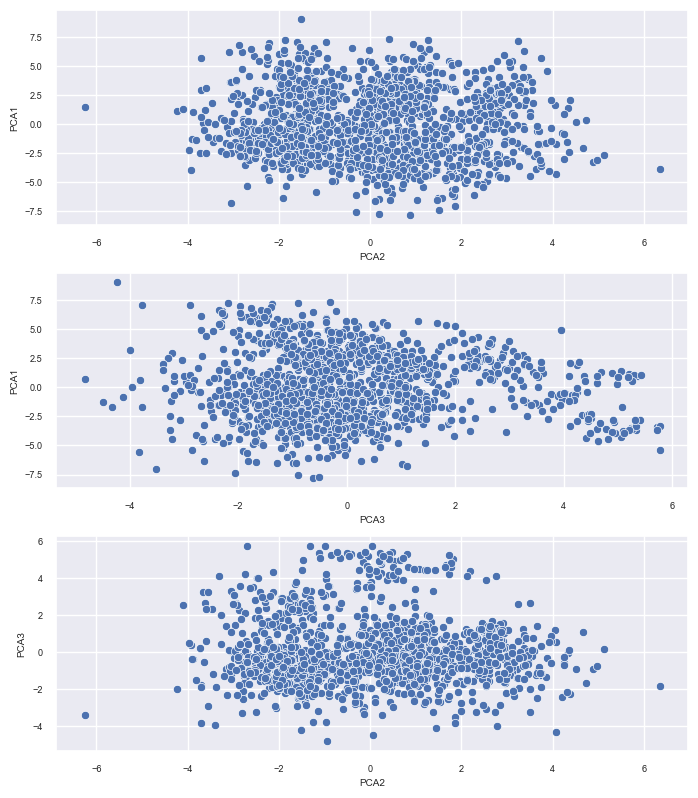

In [41]:
fig, ax = plt.subplots(figsize = (7,8), nrows = 3, ncols = 1)

sns.scatterplot(x = pca_test['PCA2'], y = pca_test['PCA1'], ax = ax[0])
sns.scatterplot(x = pca_test['PCA3'], y = pca_test['PCA1'], ax = ax[1])
sns.scatterplot(x = pca_test['PCA2'], y = pca_test['PCA3'], ax = ax[2])
plt.tight_layout()

In [42]:
pca_train_new = pca_train.drop('PCA3', axis =1)
pca_test_new = pca_test.drop('PCA3', axis = 1)

## Prediction

In [43]:
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, Ridge, Lasso

In [44]:
alphas = [0.05,0.1,0.5,1,1.5,2,2.5,5,10]
ridge_cv = [rmse_cv(Ridge(alpha = a)).mean() for a in alphas]
ridge_cv_series = pd.Series(ridge_cv, index = alphas)
ridge_cv_series

0.05     0.136354
0.10     0.136324
0.50     0.136144
1.00     0.136010
1.50     0.135937
2.00     0.135904
2.50     0.135896
5.00     0.136035
10.00    0.136584
dtype: float64

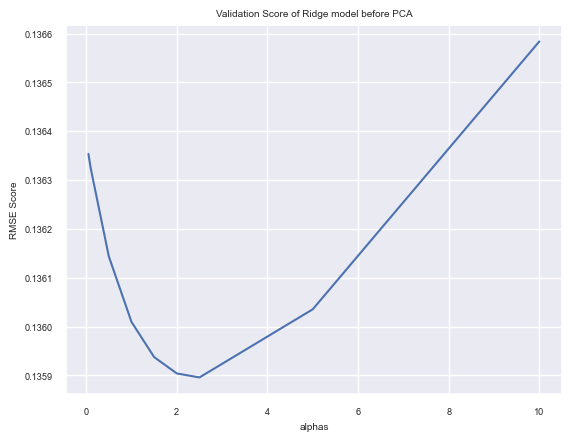

In [45]:
ridge_cv_series.plot(title = 'Validation Score of Ridge model before PCA')
plt.xlabel('alphas')
plt.ylabel('RMSE Score')
plt.show()

In [46]:
def rmse_cv_pca(model):
    rmse = np.sqrt(-cross_val_score(model, X_train_pca, y_train, scoring = 'neg_mean_squared_error', cv = 5))
    return rmse

In [80]:
alphas = [0.05,0.1,0.5,1,1.5,2,2.5,5,10]
ridge_pca = [rmse_cv_pca(Ridge(alpha = a)).mean() for a in alphas]
ridge_pca_series = pd.Series(ridge_pca, index = alphas)
ridge_pca_series

0.05     0.158960
0.10     0.158960
0.50     0.158960
1.00     0.158960
1.50     0.158960
2.00     0.158960
2.50     0.158960
5.00     0.158960
10.00    0.158961
dtype: float64

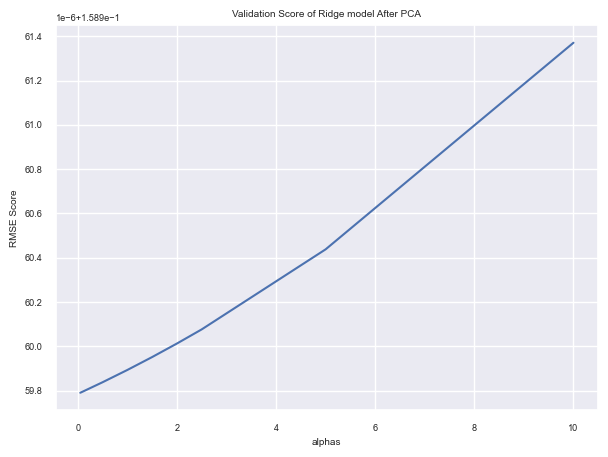

In [81]:
plt.figure(figsize = (7,5))
ridge_pca_series.plot(title = 'Validation Score of Ridge model After PCA')
plt.xlabel('alphas')
plt.ylabel('RMSE Score')
plt.show()

In [49]:
lasso_cv = [rmse_cv(Lasso(alpha = a)).mean() for a in alphas]
lasso_cv_series = pd.Series(lasso_cv, index = alphas)
lasso_cv_series

0.05     0.199797
0.10     0.221897
0.50     0.264374
1.00     0.268183
1.50     0.274387
2.00     0.282833
2.50     0.290906
5.00     0.304825
10.00    0.307456
dtype: float64

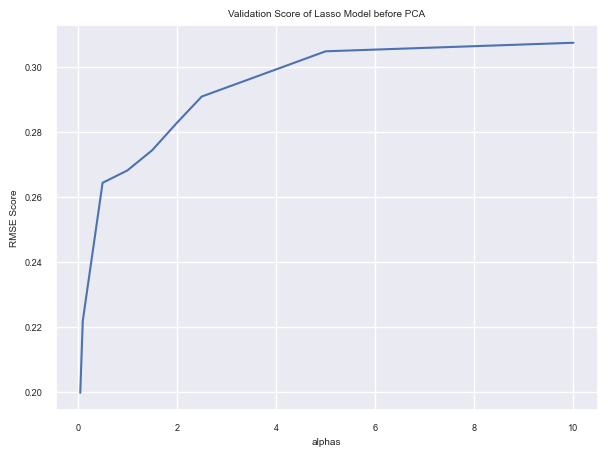

In [50]:
plt.figure(figsize = (7,5))
lasso_cv_series.plot(title = 'Validation Score of Lasso Model before PCA')
plt.xlabel('alphas')
plt.ylabel('RMSE Score')
plt.show()

In [51]:
lasso_cv_pca = [rmse_cv_pca(Lasso(alpha = a)).mean() for a in alphas]
lasso_cv_pca_series = pd.Series(lasso_cv_pca, index = alphas)
lasso_cv_pca_series

0.05     0.164672
0.10     0.173524
0.50     0.245984
1.00     0.393185
1.50     0.399226
2.00     0.399226
2.50     0.399226
5.00     0.399226
10.00    0.399226
dtype: float64

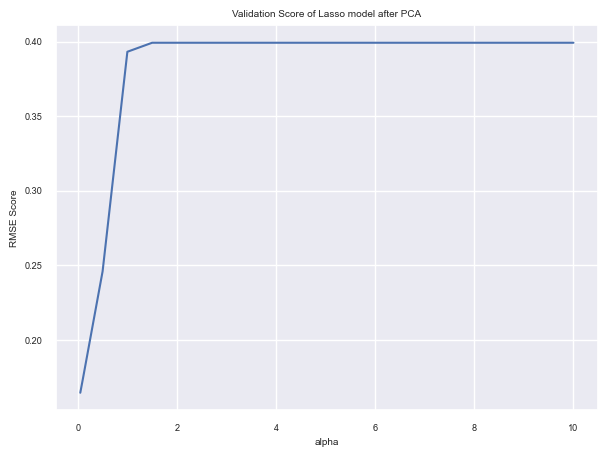

In [52]:
plt.figure(figsize = (7,5))
lasso_cv_pca_series.plot(title = 'Validation Score of Lasso model after PCA')
plt.xlabel('alpha')
plt.ylabel('RMSE Score')
plt.show()

In [53]:
lassocv = LassoCV(alphas = [1, 0.5, 0.1, 0.05, 0.001]).fit(X_train, y_train)
rmse_cv(lassocv).mean()

0.13572101487999486

In [54]:
lassocv

LassoCV(alphas=[1, 0.5, 0.1, 0.05, 0.001])

In [55]:
lassocv_pca = LassoCV(alphas = [1, 0.5, 0.1, 0.05, 0.001]).fit(X_train_pca, y_train)
rmse_cv(lassocv_pca).mean()

0.13572101487999486

In [56]:
lassocv_pca

LassoCV(alphas=[1, 0.5, 0.1, 0.05, 0.001])

In [57]:
coef = pd.Series(lassocv.coef_, index = X_train.columns)

In [58]:
print('Lasso picked ' + str(sum(coef != 0)) + ' variables and eliminate other ' + str(sum(coef == 0)) + ' variables')

Lasso picked 46 variables and eliminate other 8 variables


In [59]:
coef_series = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficient in LassoCV model')

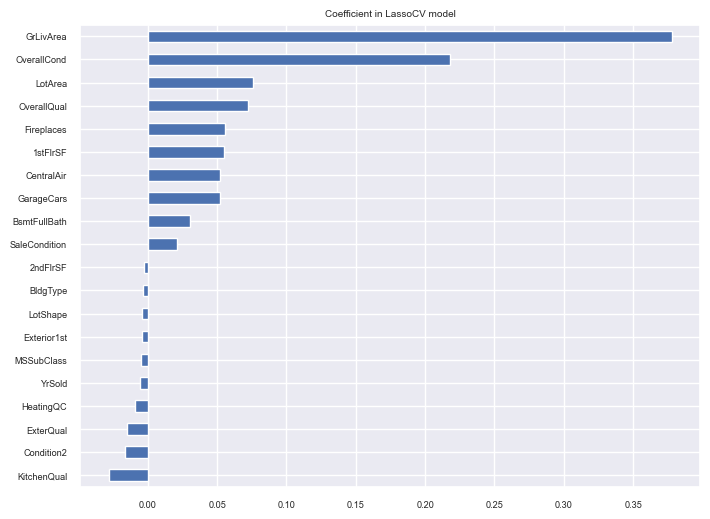

In [60]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
coef_series.plot(kind = 'barh')
plt.title('Coefficient in LassoCV model')

In [61]:
lassocv_pca.coef_

array([ 0.12834685, -0.01374876,  0.03005042])

In [62]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)
params = {'max_depth':3, 'eta':0.1}
model =  xgb.cv(params, dtrain, num_boost_round = 500, early_stopping_rounds=100)

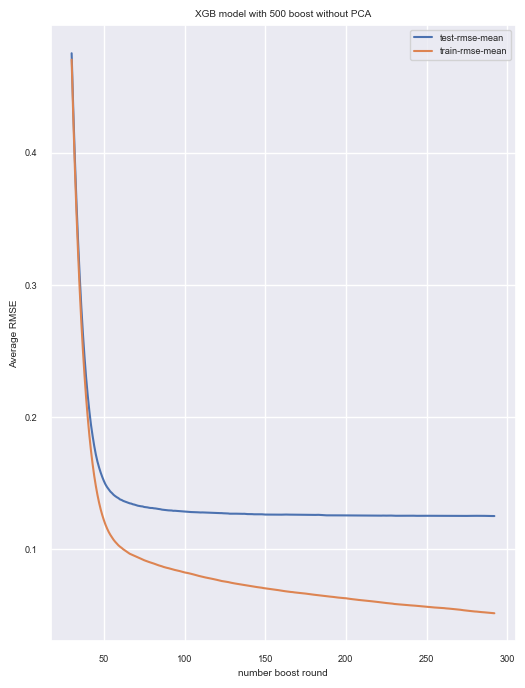

In [63]:
matplotlib.rcParams['figure.figsize'] = (6,8)
model.loc[30:, ['test-rmse-mean', 'train-rmse-mean']].plot()
plt.xlabel('number boost round')
plt.ylabel('Average RMSE')
plt.title('XGB model with 500 boost without PCA')
plt.show()

In [64]:
dtrain_pca = xgb.DMatrix(X_train_pca,  y_train)
dtest_pca = xgb.DMatrix(X_test_pca)
params = {'max_depth':3, 'eta':0.1}
model_pca =  xgb.cv(params, dtrain_pca, num_boost_round = 500, early_stopping_rounds=100)

In [65]:
model_pca

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,10.380516,0.003151,10.380511,0.007226
1,9.345149,0.002915,9.345143,0.007586
2,8.413392,0.002710,8.413386,0.007926
3,7.574712,0.002487,7.574666,0.008338
4,6.819811,0.002295,6.819515,0.008385
...,...,...,...,...
71,0.126515,0.003747,0.150197,0.008854
72,0.126236,0.003743,0.150172,0.008843
73,0.125834,0.003885,0.150196,0.008863
74,0.125660,0.003857,0.150126,0.008772


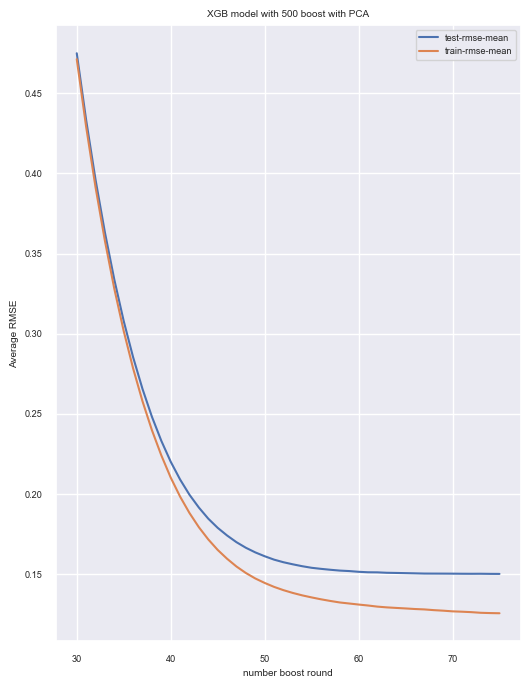

In [66]:
model_pca.loc[30:, ['test-rmse-mean', 'train-rmse-mean']].plot()
plt.xlabel('number boost round')
plt.ylabel('Average RMSE')
plt.title('XGB model with 500 boost with PCA')
plt.show()

In [67]:
xgb_mod =  xgb.XGBRegressor(n_estimators = 1000, max_depth = 2, learning_rate = 0.15)

xgb_mod.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [68]:
pred_xgb = np.expm1(xgb_mod.predict(X_test))
lassocv_pred = np.expm1(lassocv.predict(X_test))

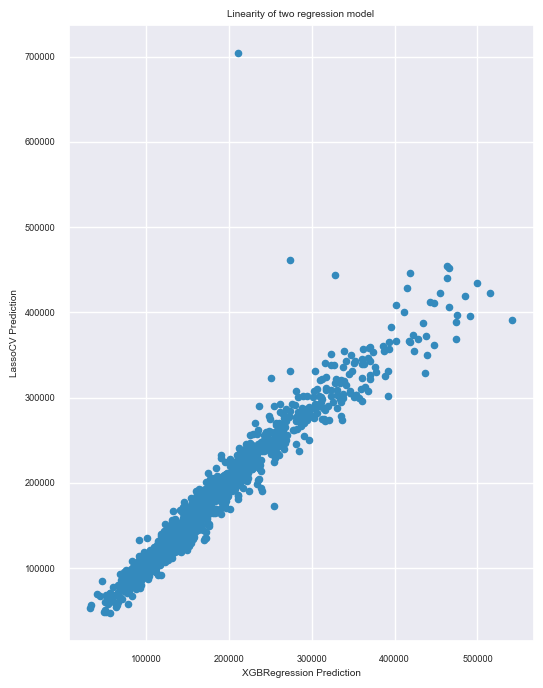

In [69]:
predictions = pd.DataFrame({'XGBRegression Prediction':pred_xgb, 'LassoCV Prediction':lassocv_pred})
predictions.plot(x = 'XGBRegression Prediction', y = 'LassoCV Prediction', kind = 'scatter')
plt.title('Linearity of two regression model')
plt.show()

In [70]:
xgb_pca = xgb.XGBRegressor(n_estimators = 1000, max_depth = 2, learning_rate = 0.15)
xgb_pca.fit(X_train_pca, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [71]:
pred_xgb_pca = np.expm1(xgb_pca.predict(X_test_pca))
lassocv_pred_pca = np.expm1(lassocv_pca.predict(X_test_pca))

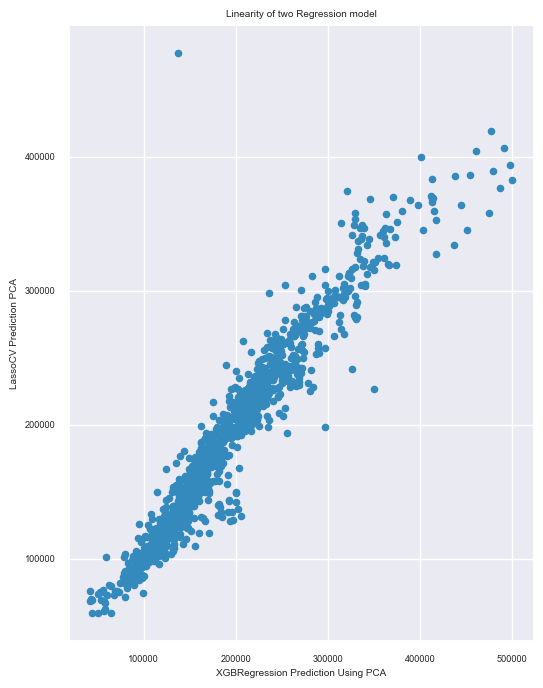

In [72]:
pred_pca = pd.DataFrame({'XGBRegression Prediction Using PCA':pred_xgb_pca, 'LassoCV Prediction PCA':lassocv_pred_pca})
pred_pca.plot(kind ='scatter',  x = 'XGBRegression Prediction Using PCA', y = 'LassoCV Prediction PCA')
plt.title('Linearity of two Regression model')
plt.show()

In [73]:
preds_ = 0.6*lassocv_pred + 0.4*pred_xgb

In [74]:
preds_pca = 0.6*lassocv_pred_pca + 0.4*pred_xgb_pca

In [75]:
solutions = pd.DataFrame({'ID':df_test.Id, 'SalePrice':preds_})

In [76]:
solutions_pca = pd.DataFrame({'ID':df_test.Id, 'SalePrice':preds_pca})

In [77]:
solutions_pca

,ID,SalePrice
0,1461,123880.251003
1,1462,152102.747516
2,1463,194115.712374
3,1464,219009.602941
4,1465,214171.979004
...,...,...
1454,2915,113836.129473
1455,2916,126690.162924
1456,2917,156504.352080
1457,2918,137981.124453


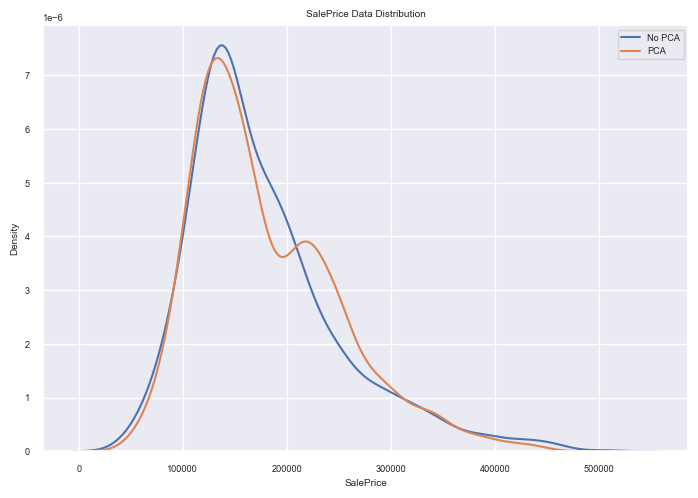

In [78]:
plt.figure(figsize = (7,5))

sns.kdeplot(data = solutions,  x = solutions['SalePrice'])
sns.kdeplot(data = solutions_pca, x = solutions_pca['SalePrice'])
plt.legend(['No PCA', 'PCA'])
plt.title('SalePrice Data Distribution')
plt.tight_layout()

In [79]:
solutions_pca.to_csv('PCA_solutions.csv', index = False)